# Libraries

In [1]:
import numpy as np
import pandas as pd

import re
import string

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

# Import Data

In [2]:
data = pd.read_csv("../data/original_data.csv")
data

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


# About data

In [3]:
print("Data Shape    :", data.shape)
print("Movie Count   :", data.title.nunique())
print("Genre Count   :", data.genre.nunique())

Data Shape    : (4657, 4)
Movie Count   : 4296
Genre Count   : 10


In [4]:
data.isna().sum()

index      0
title      0
genre      0
summary    0
dtype: int64

We observe that there is no missing data in our data.

In [5]:
# Duplicate title
data[data.title.duplicated()]

,index,title,genre,summary
329,329,Outcast,fantasy,"At the beginning of the book, Hollypaw, Lionp..."
466,466,The Immortals,fantasy,When a cure for AIDS turns out to be more vir...
566,566,Dawn,science,Isak has attempted to explain his foretelling...
1059,1059,Revelation,crime,The plot centres around the challenges of pos...
1088,1088,Nemesis,crime,Miss Marple receives a post card from the rec...
...,...,...,...,...
4598,4598,The Alchemist,fantasy,"Combining magic, mysticism, wisdom and wonder ..."
4604,4604,The Goose Girl,fantasy,She was born with her eyes closed and a word o...
4616,4616,The Phantom Tollbooth,fantasy,Librarian's Note: For an alternate cover editi...
4638,4638,Perdido Street Station,fantasy,"Beneath the towering bleached ribs of a dead, ..."


In [6]:
# Duplicate summary
data[data.summary.duplicated()]

,index,title,genre,summary
1574,1574,Guardians of Ga'Hoole Book 4: The Siege,history,==Receptio
2936,2936,Conviction,thriller,As described by Sherryl Connelly of the New Y...
3038,3038,The Radium Girls: The Dark Story of America's ...,history,The incredible true story of the women who fou...
3201,3201,Man's Search for Meaning,psychology,Psychiatrist Viktor Frankl's memoir has rivete...
3412,3412,A Short History of Nearly Everything,science,Bill Bryson describes himself as a reluctant t...
...,...,...,...,...
4500,4500,"Hush, Hush",fantasy,A SACRED OATH\nA FALLEN ANGEL\nA FORBIDDEN LOV...
4503,4503,Dracula,fantasy,You can find an alternative cover edition for ...
4532,4532,The Hitchhiker's Guide to the Galaxy,fantasy,Seconds before the Earth is demolished to make...
4535,4535,Shatter Me,fantasy,I have a curse\nI have a gift\n\nI am a monste...


In [7]:
data[data.title=='The Hunger Games']

,index,title,genre,summary
506,506,The Hunger Games,science,The Hunger Games takes place in a nation know...
3331,3331,The Hunger Games,romance,"Could you survive on your own in the wild, wit..."
3527,3527,The Hunger Games,science,"Could you survive on your own in the wild, wit..."
4328,4328,The Hunger Games,fantasy,"Could you survive on your own in the wild, wit..."


We observe that, our data have duplicate values in our summary and title. We also observe that our duplicate title with same summary has been classified into several different genres.

# Analysis

In [8]:
# Genre Counts
data['genre'].value_counts()

thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: genre, dtype: int64

<AxesSubplot:>

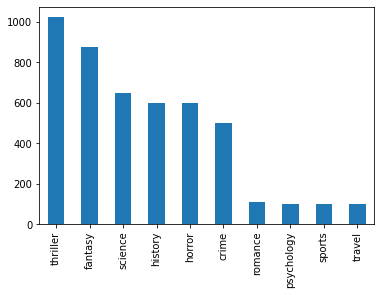

In [9]:
# Bar Plot for Genre counts
data.genre.value_counts().sort_values(ascending = False).plot(kind = 'bar')

Out of the 10 available Genres, romance, travel, sports, and, psychology are very few in number (less than 120 individually).

In [10]:
# count words of lyrics
data["word_count"] = data.summary.str.split().str.len()
print('Minimum word count: ', data.word_count.min())
print('Maximum word count: ', data.word_count.max())
data.head()

Minimum word count:  1
Maximum word count:  5663


,index,title,genre,summary,word_count
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,803
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",563
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,334
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,776
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,1190


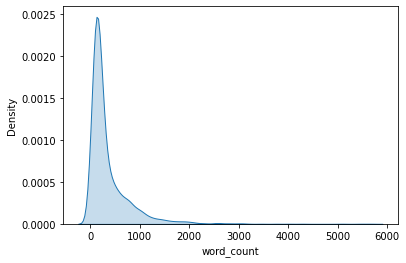

In [11]:
# density plot of word_count for summary with shade
sns.kdeplot(data['word_count'], shade=True)
plt.show()

In [12]:
data.word_count.describe()

count    4657.000000
mean      359.148594
std       437.584315
min         1.000000
25%       118.000000
50%       193.000000
75%       436.000000
max      5663.000000
Name: word_count, dtype: float64

We observe that the word count varies so much, with minimum value as 1 and maximum value as 5663

# Data Cleaning

In [13]:
# Drop column index
data = data.drop(['index'], axis=1)

In [14]:
# We remove the genres that are very few in number.

# Remove Genres
remove_genre_list = ['romance', 'psychology', 'sports', 'travel']

data = data[~data['genre'].isin(remove_genre_list)]
print("Available genres: ", data.genre.unique())

Available genres:  ['fantasy' 'science' 'crime' 'history' 'horror' 'thriller']


In [15]:
# We remove all the duplicated rows with same title or summary
data = data.drop_duplicates(subset='title', keep="first")
data = data.drop_duplicates(subset='summary', keep="first")

data.head()

,title,genre,summary,word_count
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,803
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",563
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,334
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,776
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,1190


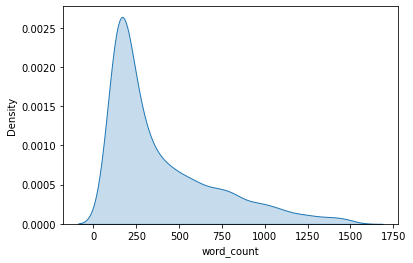

In [16]:
# Remove rows with word_count less than 100 or more than 1000 
MAX_WORD = 1500
MIN_WORD = 100

data = data[data.word_count <= MAX_WORD]
data = data[data.word_count >= MIN_WORD]

sns.kdeplot(data['word_count'], shade=True)
plt.show()

In [17]:
data = data.reset_index(drop=True)
data

,title,genre,summary,word_count
0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,803
1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",563
2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,334
3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,776
4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,1190
...,...,...,...,...
3097,Wintersmith,fantasy,Tiffany Aching is a trainee witch — now workin...,132
3098,Fantastic Beasts and Where to Find Them: The O...,fantasy,J.K. Rowling's screenwriting debut is captured...,117
3099,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ...",144
3100,Red Rising,fantasy,"""I live for the dream that my children will be...",244


<AxesSubplot:>

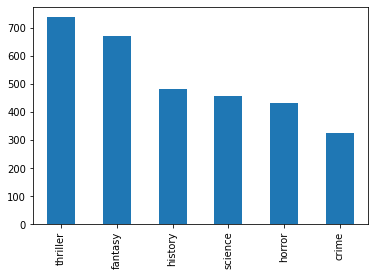

In [19]:
data.genre.value_counts().sort_values(ascending = False).plot(kind = 'bar')

# Export Cleaned Data

In [18]:
# Export data
data.to_csv( "data/clean_data.csv", index=False, encoding='utf-8-sig')